In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

import glob, os

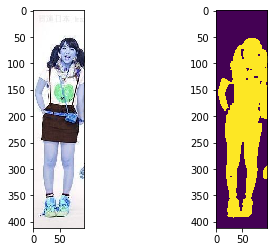

In [4]:
img = cv2.imread('../segmentation/humanparsing/JPEGImages/Multi_59.jpg', cv2.IMREAD_COLOR)
label_img = cv2.imread('../segmentation/humanparsing/Segmentations/Multi_59.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(label_img)

100%|██████████| 12706/12706 [00:59<00:00, 214.11it/s]


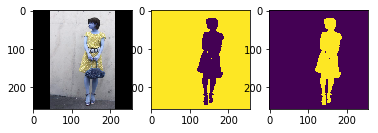

In [5]:
BASE_PATH = '../segmentation/'
IMG_WIDTH, IMG_HEIGHT = 256, 256
N_CLASSES = 2

with open('data/seg_train.txt', 'r') as f:
    train_list = f.readlines()
    
x_train = np.zeros((len(train_list), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
y_train = np.zeros((len(train_list), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.uint8)
    
for i, train_path in enumerate(tqdm(train_list)):
    img_path = os.path.join(BASE_PATH, train_path.split(' ')[0])
    label_path = os.path.join(BASE_PATH, train_path.split(' ')[-1].strip())
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    label_img = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    
    # result
    im = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8)
    lim = np.zeros((IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)

    if img.shape[0] >= img.shape[1]:
        scale = img.shape[0] / IMG_HEIGHT
        new_width = int(img.shape[1] / scale)
        diff = (IMG_WIDTH - new_width) // 2
        img = cv2.resize(img, (new_width, IMG_HEIGHT))
        label_img = cv2.resize(label_img, (new_width, IMG_HEIGHT))

        im[:, diff:diff + new_width, :] = img
        lim[:, diff:diff + new_width] = label_img
    else:
        scale = img.shape[1] / IMG_WIDTH
        new_height = int(img.shape[0] / scale)
        diff = (IMG_HEIGHT - new_height) // 2
        img = cv2.resize(img, (IMG_WIDTH, new_height))
        label_img = cv2.resize(label_img, (IMG_WIDTH, new_height))
        im[diff:diff + new_height, :, :] = img
        lim[diff:diff + new_height, :] = label_img
        
    seg_labels = np.zeros((IMG_HEIGHT, IMG_WIDTH, N_CLASSES), dtype=np.uint8)
    for c in range(N_CLASSES):
        seg_labels[:, :, c] = (lim == c).astype(np.uint8)
    
    x_train[i] = im
    y_train[i] = seg_labels
    
plt.subplot(1, 3, 1)
plt.imshow(x_train[0])
plt.subplot(1, 3, 2)
plt.imshow(y_train[0,:,:,0])
plt.subplot(1, 3, 3)
plt.imshow(y_train[0,:,:,1])

In [6]:
np.savez_compressed('data/x_train.npz', data=x_train)
np.savez_compressed('data/y_train.npz', data=y_train)

100%|██████████| 5000/5000 [00:21<00:00, 229.47it/s]


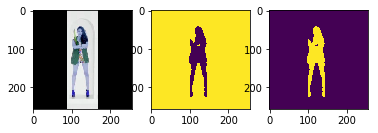

In [7]:
with open('data/seg_test.txt', 'r') as f:
    test_list = f.readlines()
    
x_val = np.zeros((len(test_list), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
y_val = np.zeros((len(test_list), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.uint8)
    
for i, test_path in enumerate(tqdm(test_list)):
    img_path = os.path.join(BASE_PATH, test_path.split(' ')[0])
    label_path = os.path.join(BASE_PATH, test_path.split(' ')[-1].strip())
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    label_img = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    
    # result
    im = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8)
    lim = np.zeros((IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)

    if img.shape[0] >= img.shape[1]:
        scale = img.shape[0] / IMG_HEIGHT
        new_width = int(img.shape[1] / scale)
        diff = (IMG_WIDTH - new_width) // 2
        img = cv2.resize(img, (new_width, IMG_HEIGHT))
        label_img = cv2.resize(label_img, (new_width, IMG_HEIGHT))

        im[:, diff:diff + new_width, :] = img
        lim[:, diff:diff + new_width] = label_img
    else:
        scale = img.shape[1] / IMG_WIDTH
        new_height = int(img.shape[0] / scale)
        diff = (IMG_HEIGHT - new_height) // 2
        img = cv2.resize(img, (IMG_WIDTH, new_height))
        label_img = cv2.resize(label_img, (IMG_WIDTH, new_height))
        im[diff:diff + new_height, :, :] = img
        lim[diff:diff + new_height, :] = label_img
        
    seg_labels = np.zeros((IMG_HEIGHT, IMG_WIDTH, N_CLASSES), dtype=np.uint8)
    for c in range(N_CLASSES):
        seg_labels[:, :, c] = (lim == c).astype(np.uint8)

    x_val[i] = im
    y_val[i] = seg_labels
    
plt.subplot(1, 3, 1)
plt.imshow(x_val[-1])
plt.subplot(1, 3, 2)
plt.imshow(y_val[-1,:,:,0])
plt.subplot(1, 3, 3)
plt.imshow(y_val[-1,:,:,1])

In [8]:
np.savez_compressed('data/x_val.npz', data=x_val)
np.savez_compressed('data/y_val.npz', data=y_val)